In [1]:
import pandas as pd
import numpy as np
filepath = r'./xvector-mha__20210604T095533_train_old.log'

In [4]:
df = pd.read_table(filepath, names=[0])
df

,0
0,# python -m torch.distributed.launch --nproc_p...
1,# Started at Fri Jun 4 11:55:33 CEST 2021
2,#
3,"Namespace(baseLR=0.001, batchSize=32, featDim=..."
4,Initializing model...
...,...
5097,*****************************************
5098,Setting OMP_NUM_THREADS environment variable f...
5099,*****************************************
5100,# Accounting: time=122570 threads=1


In [18]:
df = df.loc[df[0].str.contains('Avg Loss/batch')]
print(df.iloc[0][0])

Epoch: (1/2)    Batch: (200/11442)    Avg Time/batch: 0.068    Avg Loss/batch: 9.006


In [40]:
df['Epoch'] = df[0].str.extract('Epoch: \((\d+)/\d\)').astype(int)
df['Batch'] = df[0].str.extract('Batch: \((\d+)/\d+\)').astype(int)
df['Avg Time/batch'] = df[0].str.extract('Avg Time/batch: ([0-9]*[.]?[0-9]+)').astype(float)
df['Avg Loss/batch'] = df[0].str.extract('Avg Loss/batch: ([0-9]*[.]?[0-9]+)').astype(float)
df

,0,epoch,batch,Epoch,Batch,Avg Time/batch,Avg Loss/batch
58,Epoch: (1/2) Batch: (200/11442) Avg Time...,1,200,1,200,0.068,9.006
59,Epoch: (1/2) Batch: (400/11442) Avg Time...,1,400,1,400,0.068,9.093
60,Epoch: (1/2) Batch: (600/11442) Avg Time...,1,600,1,600,0.068,8.910
61,Epoch: (1/2) Batch: (800/11442) Avg Time...,1,800,1,800,0.068,8.801
62,Epoch: (1/2) Batch: (1000/11442) Avg Tim...,1,1000,1,1000,0.091,8.747
...,...,...,...,...,...,...,...
5089,Epoch: (2/2) Batch: (4400/11442) Avg Tim...,2,4400,2,4400,0.151,8.683
5090,Epoch: (2/2) Batch: (4600/11442) Avg Tim...,2,4600,2,4600,0.113,8.735
5091,Epoch: (2/2) Batch: (4800/11442) Avg Tim...,2,4800,2,4800,0.114,8.809
5092,Epoch: (2/2) Batch: (5000/11442) Avg Tim...,2,5000,2,5000,0.145,8.732


<AxesSubplot:>

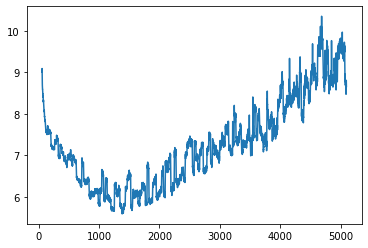

In [46]:
df['Avg Loss/batch'].plot()